<a href="https://colab.research.google.com/github/nathaliemondoukpe12/app_gest_task/blob/main/analysetexte.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

chargement du texte

In [ ]:
with open("/content/sample_data/afriquedev.txt", "r", encoding="latin-1") as f:
    texte = f.read()

print(texte[:500])  # aperçu

Du développement de l'Afrique. Vers de nouveaux paradigmes ?
Après un peu plus de soixante ans dindépendance, la plupart des pays africains demeurent encore étroitement liés à leurs anciennes puissances coloniales sur les plans économique, politique et militaire. Pourtant, lindépendance devait symboliser lémancipation de ces pays vis-à-vis de limpérialisme et du néocolonialisme, en leur permettant de définir librement leur politique de gouvernance et de développement, à partir de leurs propr


Nettoyage du texte

In [ ]:
import re


def nettoyage_texte(texte):
    # supprimer les retours à la ligne
    texte = texte.replace("\n", " ")

    # supprimer chiffres
    texte = re.sub(r"\d+", "", texte)

    # supprimer ponctuation et caractères spéciaux
    texte = re.sub(r"[^\w\s]", "", texte)

    # supprimer espaces multiples
    texte = re.sub(r"\s+", " ", texte)

    return texte.strip()

texte_nettoye = nettoyage_texte(texte)
print(texte_nettoye[:300])


Du développement de lAfrique Vers de nouveaux paradigmes Après un peu plus de soixante ans dindépendance la plupart des pays africains demeurent encore étroitement liés à leurs anciennes puissances coloniales sur les plans économique politique et militaire Pourtant lindépendance devait symboliser lé


In [ ]:
import nltk
import spacy
from nltk.corpus import stopwords

In [ ]:
import nltk
nlp = spacy.load("en_core_web_sm")
nltk.download("stopwords") # Download stopwords if not already present
stop = set(stopwords.words("english"))
def nettoyer(texte):
  texte =texte.lower()
  texte = re.sub(r"[^a-zA-Z\s]", " ", texte)
  doc = nlp(texte)
  tokens = [tok.lemma_ for tok in doc if tok.text not in stop and tok.is_alpha]
  return tokens

tokens = nettoyer(texte)
tokens[:20]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['du',
 'veloppement',
 'de',
 'l',
 'afrique',
 'ver',
 'de',
 'nouveaux',
 'paradigmes',
 'apr',
 'un',
 'peu',
 'plus',
 'de',
 'soixante',
 'ans',
 'ind',
 'pendance',
 'la',
 'plupart']

Normalisation

In [ ]:
import unicodedata

def normalisation_texte(texte):
    # minuscules
    texte = texte.lower()

    # suppression des accents
    texte = unicodedata.normalize("NFD", texte)
    texte = "".join(
        caractere for caractere in texte
        if unicodedata.category(caractere) != "Mn"
    )

    return texte

texte_normalise = normalisation_texte(texte_nettoye)
print(texte_normalise[:300])


du developpement de lafrique vers de nouveaux paradigmes apres un peu plus de soixante ans dindependance la plupart des pays africains demeurent encore etroitement lies a leurs anciennes puissances coloniales sur les plans economique politique et militaire pourtant lindependance devait symboliser le


Tokenisation

In [ ]:
def tokenisation(texte):
    tokens = texte.split()
    return tokens

tokens = tokenisation(texte_normalise)
print(tokens[:30])


['du', 'developpement', 'de', 'lafrique', 'vers', 'de', 'nouveaux', 'paradigmes', 'apres', 'un', 'peu', 'plus', 'de', 'soixante', 'ans', 'dindependance', 'la', 'plupart', 'des', 'pays', 'africains', 'demeurent', 'encore', 'etroitement', 'lies', 'a', 'leurs', 'anciennes', 'puissances', 'coloniales']


Suppression des stop words

In [ ]:
from nltk.corpus import stopwords
import nltk

nltk.download("stopwords")

stop_words_fr = set(stopwords.words("french"))

def suppression_stopwords(tokens):
    return [mot for mot in tokens if mot not in stop_words_fr]

tokens_sans_stopwords = suppression_stopwords(tokens)
print(tokens_sans_stopwords[:30])


['developpement', 'lafrique', 'vers', 'nouveaux', 'paradigmes', 'apres', 'peu', 'plus', 'soixante', 'ans', 'dindependance', 'plupart', 'pays', 'africains', 'demeurent', 'encore', 'etroitement', 'lies', 'a', 'leurs', 'anciennes', 'puissances', 'coloniales', 'plans', 'economique', 'politique', 'militaire', 'pourtant', 'lindependance', 'devait']


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Pipeline complet (toutes les étapes)

In [ ]:
def pipeline_pretraitement(texte):
    texte = nettoyage_texte(texte)
    texte = normalisation_texte(texte)
    tokens = tokenisation(texte)
    tokens = suppression_stopwords(tokens)
    return tokens

tokens_finaux = pipeline_pretraitement(texte)
print(tokens_finaux[:40])


['developpement', 'lafrique', 'vers', 'nouveaux', 'paradigmes', 'apres', 'peu', 'plus', 'soixante', 'ans', 'dindependance', 'plupart', 'pays', 'africains', 'demeurent', 'encore', 'etroitement', 'lies', 'a', 'leurs', 'anciennes', 'puissances', 'coloniales', 'plans', 'economique', 'politique', 'militaire', 'pourtant', 'lindependance', 'devait', 'symboliser', 'lemancipation', 'pays', 'visavis', 'limperialisme', 'neocolonialisme', 'permettant', 'definir', 'librement', 'politique']


 Réaliser une analyse exploratoire textuelle.

In [ ]:
# Nombre de caractères
nb_caracteres = len(texte)

# Nombre de mots (avant nettoyage)
nb_mots_brut = len(texte.split())

# Nombre de mots après prétraitement
nb_mots_nettoyes = len(tokens_finaux)

# Vocabulaire unique
vocabulaire_unique = len(set(tokens_finaux))

# longueur moyenne
longueur_moyenne = sum(len(mot) for mot in tokens_finaux) / nb_mots_nettoyes

print("Caractères :", nb_caracteres)
print("Mots (brut) :", nb_mots_brut)
print("Mots (nettoyés) :", nb_mots_nettoyes)
print("Vocabulaire unique :", vocabulaire_unique)
print("Longueur moyenne :", longueur_moyenne)


Caractères : 6184
Mots (brut) : 910
Mots (nettoyés) : 541
Vocabulaire unique : 372
Longueur moyenne : 7.691312384473198


In [ ]:
from collections import Counter

freq = Counter(tokens)
freq.most_common(20)

[('de', 51),
 ('et', 31),
 ('la', 24),
 ('des', 19),
 ('les', 19),
 ('developpement', 16),
 ('a', 16),
 ('en', 16),
 ('le', 14),
 ('une', 11),
 ('ces', 10),
 ('leur', 10),
 ('pays', 9),
 ('pour', 8),
 ('politiques', 8),
 ('se', 8),
 ('leurs', 7),
 ('realites', 7),
 ('il', 7),
 ('au', 7)]

Extraction d’entités nommées (NER)

In [ ]:
doc = nlp(texte)
ents = [(ent.text, ent.label_) for ent in doc.ents]
ents[:20]

[("Du développement de l'Afrique", 'ORG'),
 ('Vers de nouveaux paradigmes', 'ORG'),
 ('reconquête de la dignité', 'PERSON'),
 ('Il s\x92agissait', 'PERSON'),
 ('bien-être', 'GPE'),
 ('vécu', 'PERSON'),
 ('l\x92influence de l\x92impérialisme', 'PERSON'),
 ('jamais rompu', 'PERSON'),
 ('liens de dépendance', 'ORG'),
 ('leur ancienne métropole', 'PERSON'),
 ('la sécurité de plusieurs', 'PERSON'),
 ('sur l\x92appui de leur ex-puissance', 'ORG'),
 ('le cas de la', 'PERSON'),
 ('Sénégal', 'GPE'),
 ('Tchad', 'GPE'),
 ('Djibouti', 'GPE'),
 ('Niger', 'DATE'),
 ('essentielle de la', 'PERSON'),
 ('ce titre', 'PERSON'),
 ('elle ne', 'ORG')]

In [ ]:
from collections import defaultdict

entities_by_category = defaultdict(list)
for ent_text, ent_label in ents:
    entities_by_category[ent_label].append(ent_text)

for category, entities in entities_by_category.items():
    print(f"\nCategory: {category}")
    print(entities)


Category: ORG
["Du développement de l'Afrique", 'Vers de nouveaux paradigmes', 'liens de dépendance', 'sur l\x92appui de leur ex-puissance', 'elle ne', 'un développement véritablement endogène', 'un', 'acte de libération de soi', 'c\x92est l\x92autodéveloppement des', 'Nord', 'une même vision', 'modèle de développement', 'Cette', 'un', 'Fonds Monétaire International', 'L\x92exemple des Programmes d\x92ajustement', 'PAS', 'un', 'J.\xa0Stiglitz']

Category: PERSON
['reconquête de la dignité', 'Il s\x92agissait', 'vécu', 'l\x92influence de l\x92impérialisme', 'jamais rompu', 'leur ancienne métropole', 'la sécurité de plusieurs', 'le cas de la', 'essentielle de la', 'ce titre', 'être déléguée', 'devrait être en mesure de garantir sa propre sécurité', 'Il en va de même pour', 'bien souvent', 'E. Njoh-Mouellé', 'C. Boundja', 'J. Ki-Zerbo', 'de départ de tout', 'Pour E. Njoh-Mouellé', 'de l\x92homme', 'Il écrit', 'C. Boundja', 'l\x92authenticité de notre', 'de ce qui', 'J. Ki-Zerbo', 'doit ê

In [ ]:
# Trouver l’entité la plus mentionnée.
from collections import Counter


In [ ]:
from collections import Counter

# Extract all entity texts
all_entity_texts = [ent_text for ent_text, ent_label in ents]

# Count the occurrences of each entity
entity_counts = Counter(all_entity_texts)

# Find the most common entity
most_common_entity = entity_counts.most_common(1)

print(f"L'entité la plus mentionnée est : {most_common_entity[0][0]} (apparaît {most_common_entity[0][1]} fois)")

L'entité la plus mentionnée est : dans (apparaît 6 fois)


In [ ]:
from collections import Counter

# Extract all entity texts
all_entity_texts = [ent_text for ent_text, ent_label in ents]

# Count the occurrences of each entity
entity_counts = Counter(all_entity_texts)

# Find the most common entity
most_common_entity = entity_counts.most_common(1)

print(f"L'entité la plus mentionnée est : {most_common_entity[0][0]} (apparaît {most_common_entity[0][1]} fois)")

L'entité la plus mentionnée est : dans (apparaît 6 fois)


TF-IDF identifie les mots les plus discriminants du texte.

In [ ]:
# TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

# le texte doit être normalisé et nettoyé
corpus = [" ".join(tokens_finaux)]

vectorizer = TfidfVectorizer(
    max_features=20,
    ngram_range=(1, 2)
)

tfidf_matrix = vectorizer.fit_transform(corpus)

mots_cles = vectorizer.get_feature_names_out()
scores = tfidf_matrix.toarray()[0]

tfidf_keywords = sorted(
    zip(mots_cles, scores),
    key=lambda x: x[1],
    reverse=True
)

for mot, score in tfidf_keywords:
    print(mot, round(score, 4))

developpement 0.5862
pays 0.3297
politiques 0.2931
leurs 0.2565
realites 0.2565
cest 0.1832
comme 0.1832
etre 0.1832
africains 0.1465
dependance 0.1465
economique 0.1465
economiques 0.1465
encore 0.1465
etats 0.1465
militaire 0.1465
politique 0.1465
securite 0.1465
etrangeres 0.1099
lafrique 0.1099
politiques publiques 0.1099


Extraction des mots clé

In [ ]:
import spacy

# Download the French language model if not already present
# This command will install the model, making it available for nlp.load()
# Note: This is typically run once in a separate cell, but placed here due to constraint.
spacy.cli.download("fr_core_news_md")

nlp = spacy.load("fr_core_news_md")
doc = nlp(texte)

entites = [(ent.text, ent.label_) for ent in doc.ents]

for e in entites:
    print(e)

✔ Download and installation successful
You can now load the package via spacy.load('fr_core_news_md')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.
("l'Afrique", 'LOC')
('Afrique subsaharienne', 'LOC')
('États', 'LOC')
('États', 'LOC')
('C\x92est', 'LOC')
('Côte d\x92Ivoire', 'LOC')
('Sénégal', 'LOC')
('Tchad', 'LOC')
('Djibouti', 'LOC')
('Niger', 'LOC')
('Or', 'LOC')
('État', 'LOC')
('APD', 'ORG')
('États africains', 'LOC')
('E. Njoh-Mouellé', 'PER')
('C. Boundja', 'PER')
('J. Ki-Zerbo', 'PER')
('E. Njoh-Mouellé', 'PER')
('L\x92excellence n\x92est excellence', 'ORG')
('C. Boundja', 'PER')
('J. Ki-Zerbo', 'PER')
('du Nord', 'LOC')
('l\x92Afrique', 'LOC')
('Fonds Monétaire International', 'ORG')
('Banque mondiale', 'ORG')
('l\x92Union européenne', 'ORG')
('la Chine', 'LOC')
('J.\xa0Stiglitz', 'PER')
(

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords

# Ensure French stopwords are loaded if not already done
# In this notebook, 'stop_words_fr' is already defined in cell nRwzx0By8INO
# If it wasn't, you would add:
# import nltk
# nltk.download("stopwords")
# stop_words_fr = set(stopwords.words("french"))

vectorizer = CountVectorizer(
    stop_words=list(stop_words_fr), # Use the pre-defined French stop words list
    max_features=1000
)

X = vectorizer.fit_transform([texte])

lda = LatentDirichletAllocation(
    n_components=3,
    random_state=42
)

lda.fit(X)

terms = vectorizer.get_feature_names_out()

for idx, topic in enumerate(lda.components_):
    print(f"\nThème {idx+1}:")
    print([terms[i] for i in topic.argsort()[-8:]])


Thème 1:
['agissante', 'agissait', 'aggravé', 'africaines', 'africain', 'affirme', 'affirmation', 'adaptés']

Thème 2:
['dépendance', 'comme', 'être', 'réalités', 'leurs', 'politiques', 'pays', 'développement']

Thème 3:
['agissante', 'agissait', 'aggravé', 'africaines', 'africain', 'affirme', 'affirmation', 'adaptés']


### Interprétation des Clusters

Pour comprendre les thèmes de chaque cluster, nous allons identifier les mots clés les plus fréquents et afficher quelques phrases exemples.

In [ ]:
import numpy as np

# Get feature names (words) from the TF-IDF vectorizer
feature_names = vect.get_feature_names_out()

print("\n--- Interprétation des Clusters ---\n")

for i in range(kmeans.n_clusters):
    print(f"\nCluster {i+1}:")

    # Get indices of points belonging to this cluster
    cluster_indices = np.where(kmeans.labels_ == i)[0]

    # Get TF-IDF vectors for this cluster
    cluster_tfidf_vectors = X[cluster_indices]

    # Calculate the sum of TF-IDF scores for each feature (word) within the cluster
    cluster_tfidf_sums = cluster_tfidf_vectors.sum(axis=0)

    # Get the top N words for this cluster based on TF-IDF sums
    # Corrected: convert to dense array using np.asarray before flattening and argsort
    top_words_indices = np.asarray(cluster_tfidf_sums).flatten().argsort()[::-1][:10] # Top 10 words
    top_words = [feature_names[idx] for idx in top_words_indices]
    print(f"Mots clés (TF-IDF): {', '.join(top_words)}")

    # Print some example sentences from this cluster
    print("Exemples de phrases:")
    # Handle cases where a cluster might have fewer than 3 sentences
    example_sentences = [phrases[idx] for idx in cluster_indices[:min(3, len(cluster_indices))]]
    for j, sent in enumerate(example_sentences):
        print(f"- {sent.strip()}")


--- Interprétation des Clusters ---


Cluster 1:
Mots clés (TF-IDF): de, la, quant, des, comme, et, états, leur, par, souligné
Exemples de phrases:
- Vers de nouveaux paradigmes ?
Après un peu plus de soixante ans dindépendance, la plupart des pays africains demeurent encore étroitement liés à leurs anciennes puissances coloniales sur les plans économique, politique et militaire
- Pourtant, lindépendance devait symboliser lémancipation de ces pays vis-à-vis de limpérialisme et du néocolonialisme, en leur permettant de définir librement leur politique de gouvernance et de développement, à partir de leurs propres réalités et des aspirations de leurs populations
- Pour ces nations, lindépendance signifiait la libération, la reconquête de la dignité, la réappropriation de leur histoire et, surtout, la maîtrise de leur destin à travers la conduite souveraine de leurs politiques publiques

Cluster 2:
Mots clés (TF-IDF): de, et, pour, les, développement, en, du, se, au, le
Exemples de p

In [ ]:
phrases = texte.split(".")
tfidf = TfidfVectorizer().fit_transform(phrases)
import numpy as np


scores = tfidf.max(axis=1).toarray().flatten()
top = np.argsort(scores)[-5:]
for idx in top:
  print(phrases[idx])

 Njoh-Mouellé, C

Comme la souligné J
 Boundja et J

Pour E

Quant à J


Extraction des thèmes principaux (clustering)


In [ ]:
# Utilisation de TF-IDF + clustering KMeans.
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer

vect = TfidfVectorizer()
X = vect.fit_transform(texte.split("."))
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

KMeans(n_clusters=3)

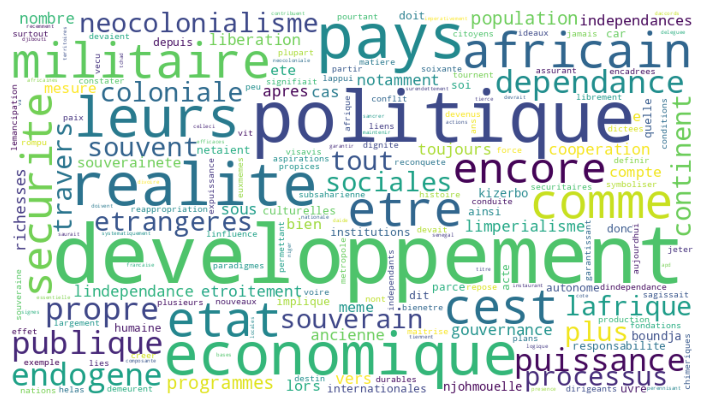

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt


wordcloud = WordCloud(
    background_color="white",
    width=800,
    height=450
).generate(" ".join(tokens_finaux))

plt.figure(figsize=(10,5))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()


### Visualisation des clusters de texte

Visualisons les clusters identifiés par l'algorithme K-Means après réduction de dimensionnalité par PCA.

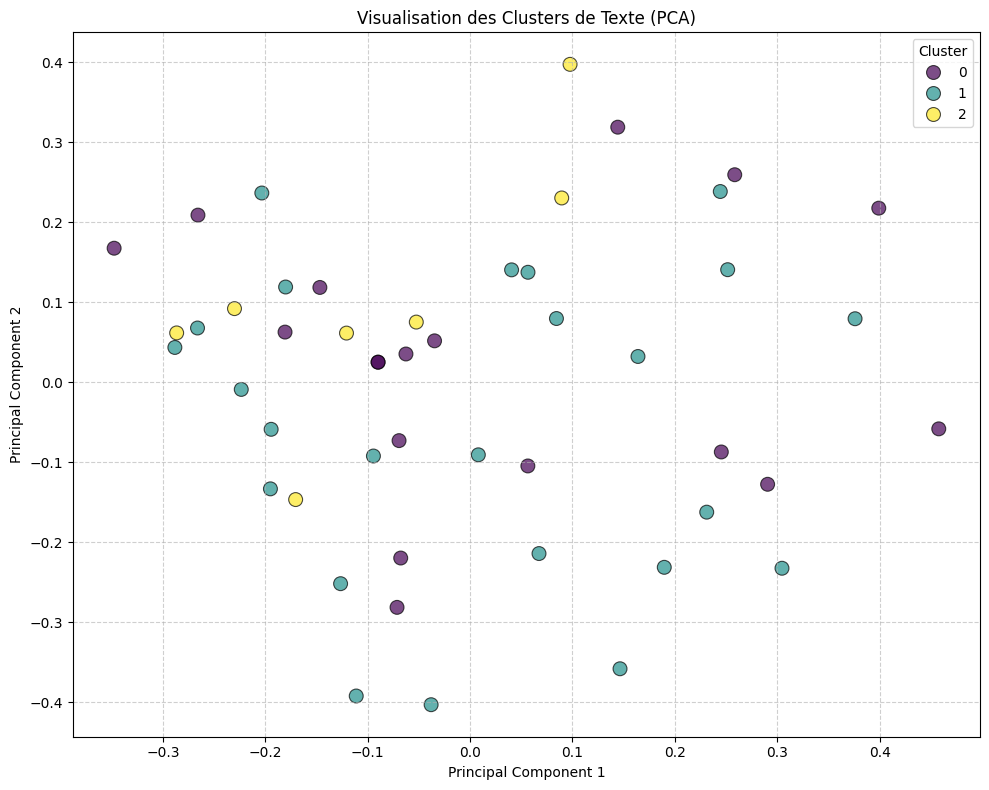

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd # Import pandas

# Assuming X (TF-IDF matrix) and kmeans (fitted KMeans model) are available from previous steps
# If not, ensure cells uHUPT0TaM6aI and qrNYpDjv7wyn are executed first.

# Reduce dimensionality to 2 components for visualization
pca = PCA(n_components=2, random_state=42)
x_pca = pca.fit_transform(X.toarray()) # Convert sparse matrix to dense array for PCA

# Get cluster labels from KMeans
cluster_labels = kmeans.labels_

# Create a DataFrame for easy plotting
df_pca = pd.DataFrame(data=x_pca, columns=['PC1', 'PC2'])
df_pca['Cluster'] = cluster_labels

plt.figure(figsize=(10, 8))
sns.scatterplot(
    x='PC1', y='PC2', hue='Cluster', data=df_pca,
    palette='viridis', s=100, alpha=0.7, edgecolor='k'
)
plt.title('Visualisation des Clusters de Texte (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()

Synthèse automatique du texte  

 Résumé par extraction

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab') # specifically for non-english punkt data

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab') # specifically for non-english punkt data

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [ ]:
!pip install sumy

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.3/97.3 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 62.7 MB/s eta 0:00:00
  Created wheel for breadability: filename=breadability-0.1.20-py2.py3-none-any.whl size=21695 sha256=5c5fa1f89388df0091b051ec1f599f0ed7ed004acffaefe363be7fcea4e73449
  Stored in directory: /root/.cache/pip/wheels/32/99/64/59305409cacd03aa03e7bddf31a9db34b1fa7033bd41972662
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13706 sha256=05951cbc9cb9d95d827a9355588077e8196c13676fb4d7fc54bd86778fdf04b4
  Stored in directory: /root/.cache/pip/wheels/1a/bf/a1/4cee4f7678c68c5875ca89eaccf460593539805c3906722228
Successfully built breadability docopt


In [ ]:
from sumy.parsers.plaintext import PlaintextParser
from sumy.nlp.tokenizers import Tokenizer
from sumy.summarizers.text_rank import TextRankSummarizer
from sumy.nlp.stemmers import Stemmer
from sumy.utils import get_stop_words

# Set language and stemmer for French
LANGUAGE = "french"
stemmer = Stemmer(LANGUAGE)

# Initialize parser with the text and language
# Ensure 'texte' variable is the cleaned/processed text you want to summarize
parser = PlaintextParser.from_string(texte, Tokenizer(LANGUAGE))

# Initialize TextRank summarizer
summarizer = TextRankSummarizer(stemmer)
summarizer.stop_words = get_stop_words(LANGUAGE)

# Generate summary (e.g., 5 sentences)
summary_sentences = summarizer(parser.document, sentences_count=5)

print("\nRésumé du texte (TextRank avec Sumy):\n")
for sentence in summary_sentences:
    print(str(sentence))


Résumé du texte (TextRank avec Sumy):

Pourtant, lindépendance devait symboliser lémancipation de ces pays vis-à-vis de limpérialisme et du néocolonialisme, en leur permettant de définir librement leur politique de gouvernance et de développement, à partir de leurs propres réalités et des aspirations de leurs populations.
Pour ces nations, lindépendance signifiait la libération, la reconquête de la dignité, la réappropriation de leur histoire et, surtout, la maîtrise de leur destin à travers la conduite souveraine de leurs politiques publiques.
En effet, nombre de pays dits indépendants nont jamais rompu les liens de dépendance avec leur ancienne métropole, notamment en matière de coopération politique, économique et militaire.
Il en va de même pour les politiques dAide publique au développement (APD) qui, bien souvent, ne tiennent pas compte des réalités sociales africaines et contribuent à maintenir les pays dans une logique de dépendance néocoloniale et de surendettement.
Il 

Résumé simple avec spaCy

In [ ]:
import spacy
from spacy.lang.fr.stop_words import STOP_WORDS
from string import punctuation
from collections import Counter

# Ensure the French language model is downloaded and loaded
spacy.cli.download("fr_core_news_md")
nlp = spacy.load("fr_core_news_md")

def resume_spacy(text, n_sentences=3):
    doc = nlp(text)

    # Word Frequency
    keywords = [token.text for token in doc if token.text.lower() not in STOP_WORDS and token.text not in punctuation and token.pos_ == 'NOUN']
    word_freq = Counter(keywords)

    # Normalize frequencies
    max_freq = max(word_freq.values() or [1]) # Handle empty case
    for word in word_freq.keys():
        word_freq[word] = word_freq[word] / max_freq

    # Sentence Scoring
    sentence_scores = {}
    for sent in doc.sents:
        for word in sent:
            if word.text.lower() in word_freq.keys():
                if sent not in sentence_scores:
                    sentence_scores[sent] = word_freq[word.text.lower()]
                else:
                    sentence_scores[sent] += word_freq[word.text.lower()]

    # Get top sentences
    summary_sentences = sorted(sentence_scores.items(), key=lambda x: x[1], reverse=True)[:n_sentences]

    # Reconstruct summary
    final_summary = [str(sentence.text) for sentence, _ in summary_sentences]
    return " ".join(final_summary)

# Generate summary using the updated function
summary_spacy = resume_spacy(texte, n_sentences=5)
print("\nRésumé du texte (avec spaCy):\n")
print(summary_spacy)

✔ Download and installation successful
You can now load the package via spacy.load('fr_core_news_md')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.

Résumé du texte (avec spaCy):

Le développement implique donc une affirmation continue de soi, une liberté agissante et responsable.
C. Boundja (2015 : 29) soutient pour sa part que le développement garantit « lauthenticité de notre essence ou de ce qui nous constitue en propre », soulignant ainsi quil sagit dun processus endogène qui ne se reçoit pas, mais se conquiert à travers des actes souverains.
Quant à J. Ki-Zerbo, il affirme : « Ce quon appelle développement, cest lautodéveloppement des pays du Nord en conformité avec les réalités, les intérêts et les valeurs de ces pays » (2003 : 152-153). Pourtant, lindépendance devait symboliser léman

In [ ]:
# Liste des stopwords + ponctuation
stopwords = list(STOP_WORDS)
punctuations = punctuation + "«»…"
print(stopwords[:10])
print(punctuations)

['celui-la', 'deux', 'notre', 'sera', 'ouverts', 'deuxième', 'ceci', "s'", 'deuxièmement', 'devra']
!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~«»…


In [ ]:
# Calcul des fréquences des mots
word_freq = {}
for token in doc:

        if token.text.lower() not in stopwords and token.text not in punctuations:
            lemma = token.lemma_.lower()
            word_freq[lemma] = word_freq.get(lemma, 0) + 1

In [ ]:
# Normalisation des fréquences
max_freq = max(word_freq.values())
for word in word_freq:
    word_freq[word] /= max_freq

Sélection des meilleures phrases

In [ ]:
# Score des phrases
sentence_scores = {}
for sent in doc.sents:
  for token in sent:
    lemma = token.lemma_.lower()
    if lemma in word_freq:
      sentence_scores[sent] = sentence_scores.get(sent, 0) + word_freq[lemma]
      #if sent not in sentence_scores:
        #sentence_scores[sent] = word_freq[lemma]
      #else:
        #sentence_scores[sent] += word_freq[lemma]

In [ ]:
# Sélection des meilleures phrases
summary_sentences = sorted(sentence_scores.items(), key=lambda x: x[1], reverse=True)[:5]
print("\nRésumé du texte (avec spaCy):\n")
for sentence, score in summary_sentences:
    print(sentence)


Résumé du texte (avec spaCy):

Quant à J. Ki-Zerbo, il affirme : « Ce quon appelle développement, cest lautodéveloppement des pays du Nord en conformité avec les réalités, les intérêts et les valeurs de ces pays » (2003 : 152-153).
C. Boundja (2015 : 29) soutient pour sa part que le développement garantit « lauthenticité de notre essence ou de ce qui nous constitue en propre », soulignant ainsi quil sagit dun processus endogène qui ne se reçoit pas, mais se conquiert à travers des actes souverains.

Cest ce que K. Nkrumah (1973 : 9) appelait déjà « le néocolonialisme », soit la continuation de la domination coloniale par dautres moyens.


Comme la souligné J. Stiglitz (2002), ces programmes ont été contre-productifs parce qu« ils nétaient pas adaptés aux réalités des pays », laissant derrière eux des États encore plus pauvres et plus endettés.
Il écrit : « Lexcellence nest excellence quaussi longtemps quelle se réaffirme tous les jours à travers ses uvres » (1998 : 15

In [ ]:
# Reconstruction du résumé
final_summary = [str(sentence) for sentence, _ in summary_sentences]
print("\nRésumé du texte (avec spaCy):\n")
print(" ".join(final_summary))



Résumé du texte (avec spaCy):

Quant à J. Ki-Zerbo, il affirme : « Ce quon appelle développement, cest lautodéveloppement des pays du Nord en conformité avec les réalités, les intérêts et les valeurs de ces pays » (2003 : 152-153). C. Boundja (2015 : 29) soutient pour sa part que le développement garantit « lauthenticité de notre essence ou de ce qui nous constitue en propre », soulignant ainsi quil sagit dun processus endogène qui ne se reçoit pas, mais se conquiert à travers des actes souverains.
 Cest ce que K. Nkrumah (1973 : 9) appelait déjà « le néocolonialisme », soit la continuation de la domination coloniale par dautres moyens.

 Comme la souligné J. Stiglitz (2002), ces programmes ont été contre-productifs parce qu« ils nétaient pas adaptés aux réalités des pays », laissant derrière eux des États encore plus pauvres et plus endettés. Il écrit : « Lexcellence nest excellence quaussi longtemps quelle se réaffirme tous les jours à travers ses uvres » (1998 : 15

### Visualisation des scores TF-IDF

Visualisons les mots-clés les plus discriminants identifiés par TF-IDF.

/tmp/ipython-input-2388138826.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=tfidf_words, y=tfidf_scores, palette='magma')


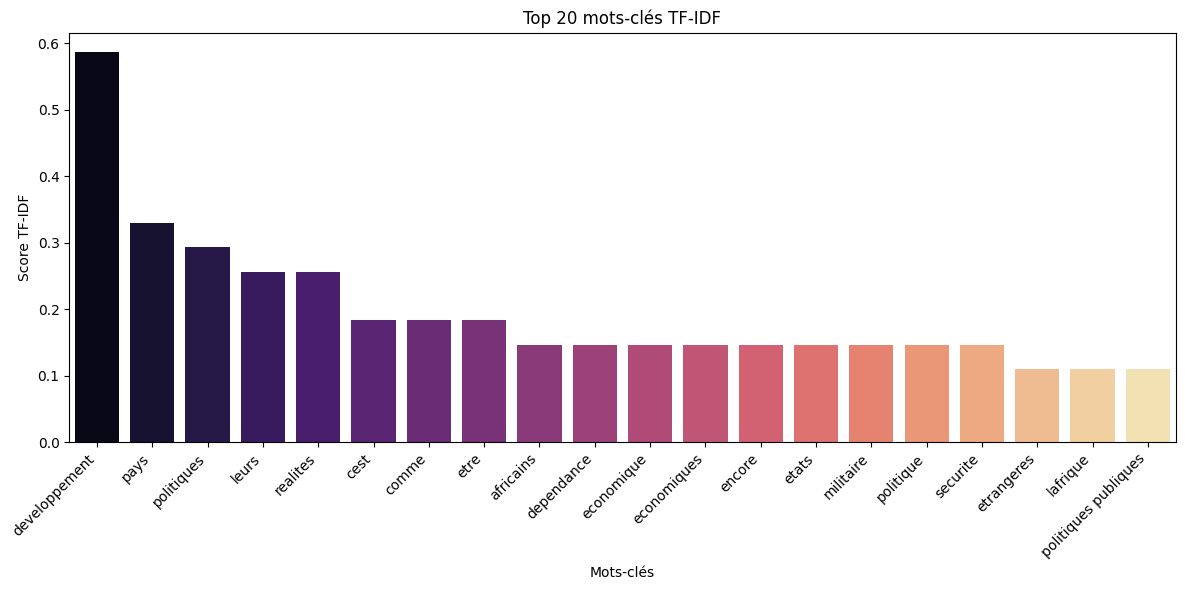

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 'tfidf_keywords' was already computed in cell 8VHu3PSPIfLZ
# It contains tuples of (word, score)

# Extract words and scores for plotting
tfidf_words = [item[0] for item in tfidf_keywords]
tfidf_scores = [item[1] for item in tfidf_keywords]

plt.figure(figsize=(12, 6))
sns.barplot(x=tfidf_words, y=tfidf_scores, palette='magma')
plt.title('Top 20 mots-clés TF-IDF')
plt.xlabel('Mots-clés')
plt.ylabel('Score TF-IDF')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Distribution des fréquences des mots (après prétraitement)

Visualisons les mots les plus fréquents après le nettoyage et la suppression des mots vides.

/tmp/ipython-input-3291404119.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=words, y=counts, palette='viridis')


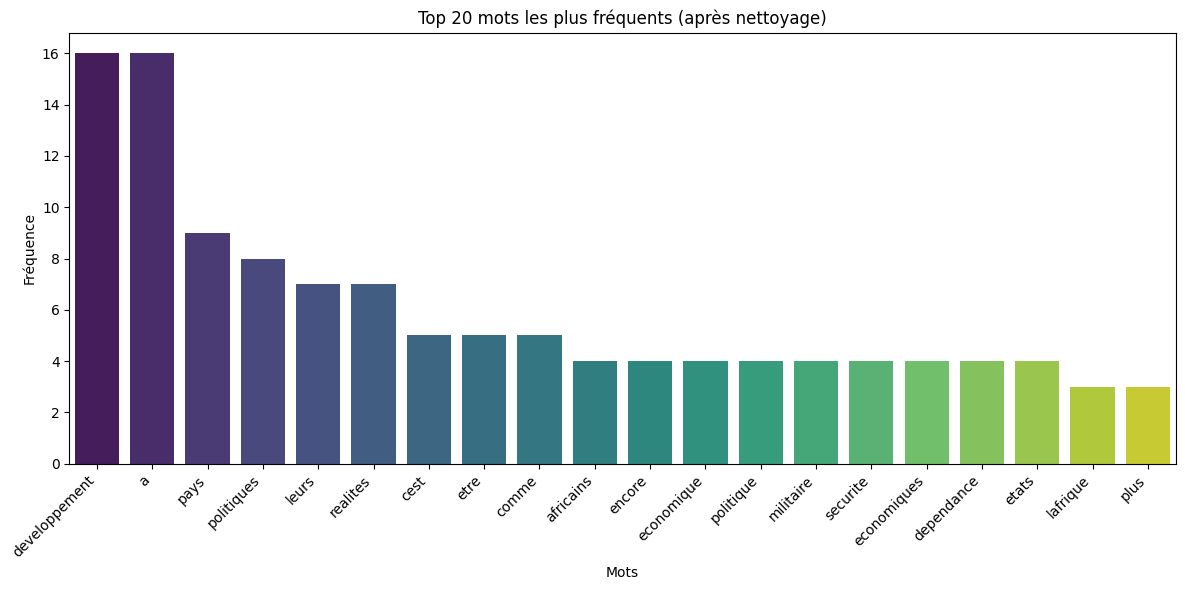

In [ ]:
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate word frequencies for cleaned tokens
freq_cleaned_tokens = Counter(tokens_finaux)

# Get the top N most common words
top_n_words = 20 # You can adjust this number
most_common_cleaned_words = freq_cleaned_tokens.most_common(top_n_words)

# Prepare data for plotting
words = [word for word, count in most_common_cleaned_words]
counts = [count for word, count in most_common_cleaned_words]

# Create the bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=words, y=counts, palette='viridis')
plt.title(f'Top {top_n_words} mots les plus fréquents (après nettoyage)')
plt.xlabel('Mots')
plt.ylabel('Fréquence')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()